<font color=#00008b size=5 face="黑體">**載入基本 package**</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import sklearn

<font color=#00008b size=5 face="黑體">**資料讀取. 探索. 處理**</font>

### 資料五 | [Online Shoppers Purchasing Intention Dataset](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset)
**變數解釋**  
  
  
**預測變數**  
Revenue:是否有購物行為 (pos: True , neg: False)  

In [2]:
shop_df = pd.read_csv('.\\data\\5.online_shoppers_intention.csv')
print('shop_df:', shop_df.shape)
shop_df.head(3)

shop_df: (12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False


In [3]:
# 資料基本描述
def data_explore(df):
    print("*Missing values :  ", df.isnull().sum().values.sum())
    print("*duplicate values :  ", df.duplicated().sum(), sep='')
    print("*Unique values & feature type : ")
    display(pd.DataFrame({'unique values':df.nunique(), 'feature type':df.dtypes}))

# 區分連續與量化資料
def split_data_by_feature_types(df):
    df_categorial, df_quantitative = [], []
    for col_name, types in zip(df.columns, df.dtypes):
        if types in ['object','bool']:
            df_categorial.append(col_name)
        else:
            df_quantitative.append(col_name)
    df_categorial = df[df_categorial]
    df_quantitative = df[df_quantitative]
    
    return df_categorial, df_quantitative

data_explore(shop_df)
shop_categorial, shop_quantitative = split_data_by_feature_types(shop_df)

*Missing values :   0
*duplicate values :  125
*Unique values & feature type : 


,unique values,feature type
Administrative,27,int64
Administrative_Duration,3335,float64
Informational,17,int64
Informational_Duration,1258,float64
ProductRelated,311,int64
ProductRelated_Duration,9551,float64
BounceRates,1872,float64
ExitRates,4777,float64
PageValues,2704,float64
SpecialDay,6,float64


In [4]:
# split data by the label
shop_pos = shop_df[shop_df["Revenue"] == True]
shop_neg = shop_df[shop_df["Revenue"] == False]

shop_df["Revenue_n"] = shop_df["Revenue"].map({True:1, False:0})

In [5]:
data_y = shop_df.Revenue
print(data_y.value_counts())
print('\npos% :', data_y.value_counts()[1]/len(data_y))

False    10422
True      1908
Name: Revenue, dtype: int64

pos% : 0.15474452554744525


In [6]:
shop_categorial.columns

Index(['Month', 'VisitorType', 'Weekend', 'Revenue'], dtype='object')

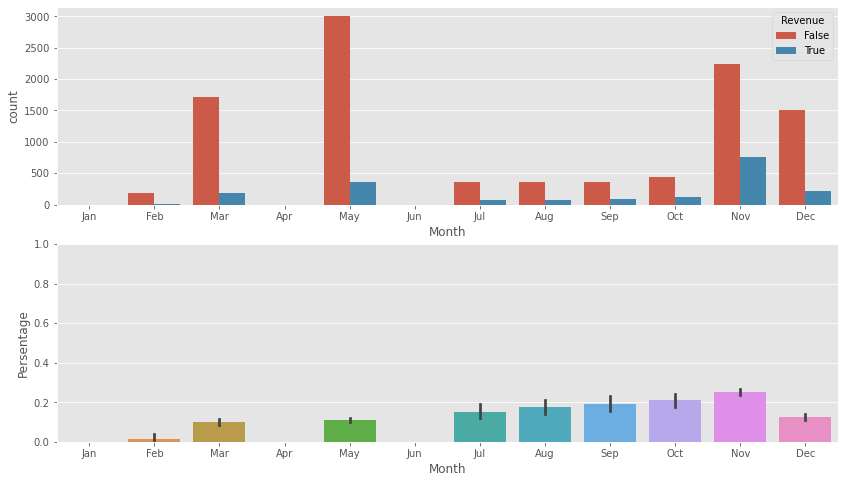

In [19]:
# 類別變數繪圖 (countplot, barplot) -- Month
month_sort = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (14,8))
ax1 = sns.countplot(x='Month', data=shop_df, hue="Revenue", ax=axes[0], order = month_sort)
ax2 = sns.barplot(x='Month', y='Revenue_n', data=shop_df, ax=axes[1], order = month_sort)
ax2.set_ylabel('Persentage')
ax2.set(ylim=(0, 1))
plt.show()

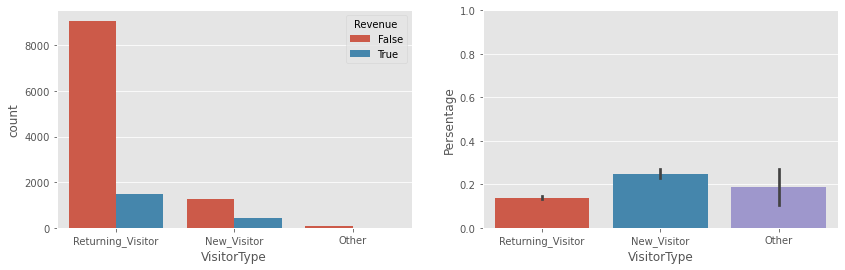

In [12]:
# 類別變數繪圖 (countplot, barplot) -- VisitorType
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (14,4))
ax1 = sns.countplot(x='VisitorType', data=shop_df, hue="Revenue", ax=axes[0])
ax2 = sns.barplot(x='VisitorType', y='Revenue_n', data=shop_df, ax=axes[1])
ax2.set_ylabel('Persentage')
ax2.set(ylim=(0, 1))
plt.show()

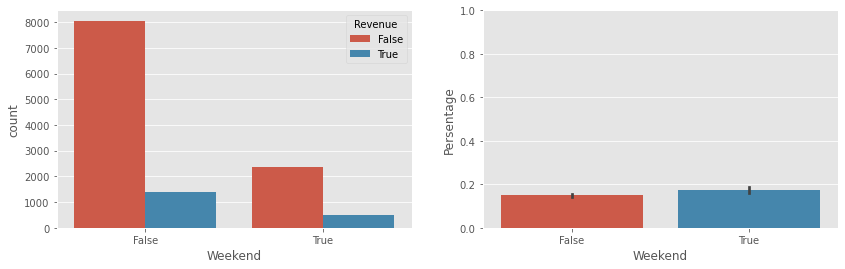

In [13]:
# 類別變數繪圖 (countplot, barplot) -- Weekend
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (14,4))
ax1 = sns.countplot(x='Weekend', data=shop_df, hue="Revenue", ax=axes[0])
ax2 = sns.barplot(x='Weekend', y='Revenue_n', data=shop_df, ax=axes[1])
ax2.set_ylabel('Persentage')
ax2.set(ylim=(0, 1))
plt.show()

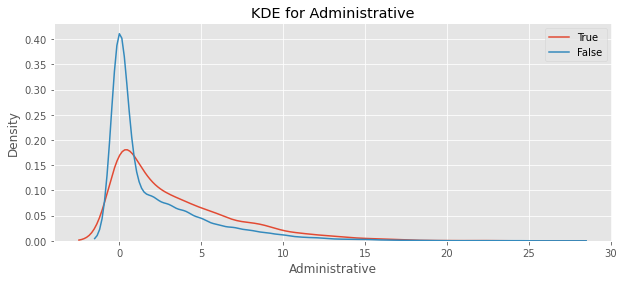

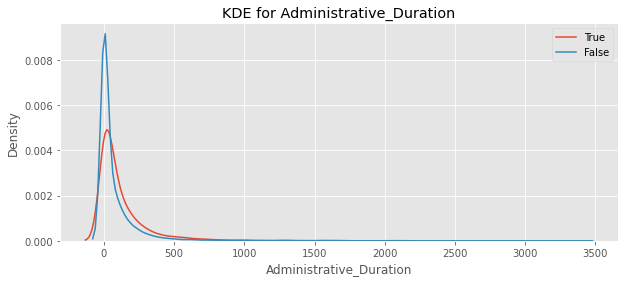

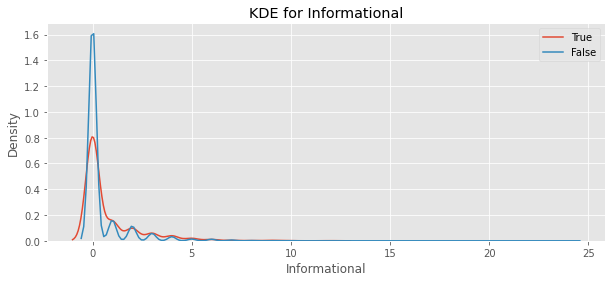

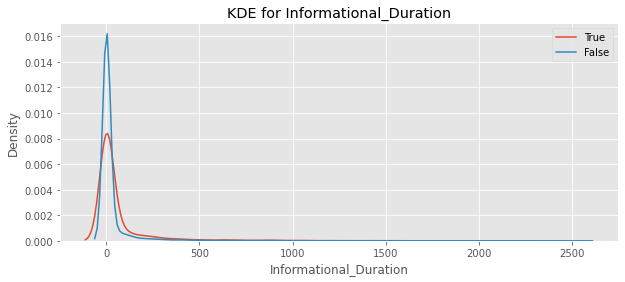

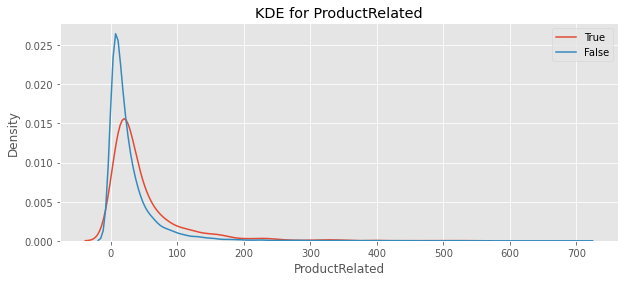

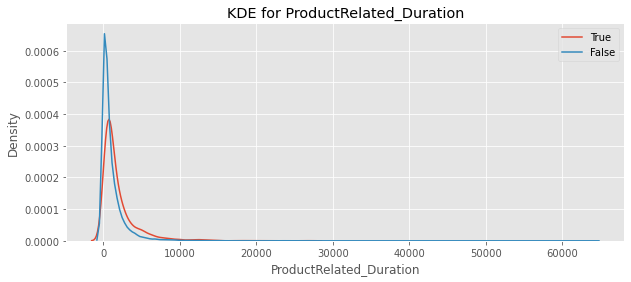

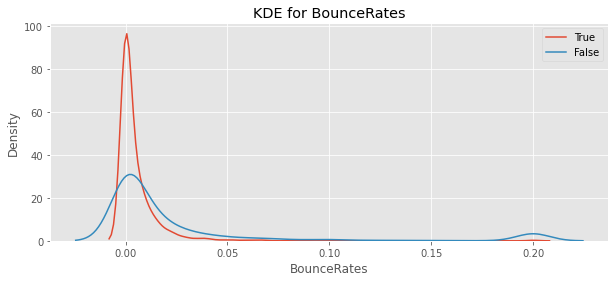

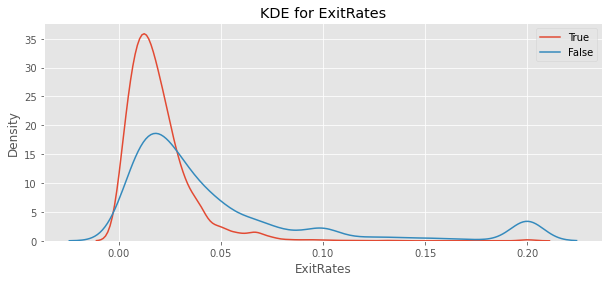

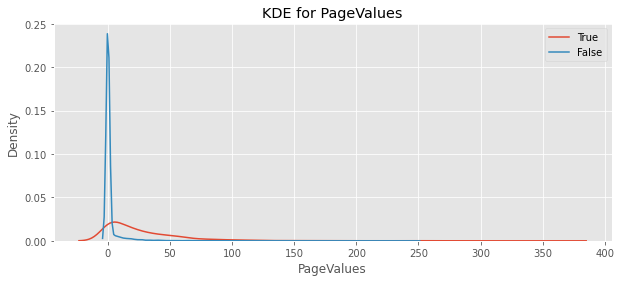

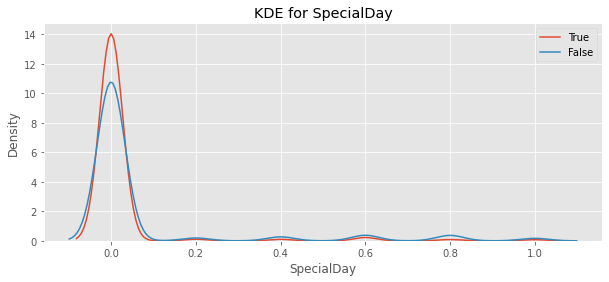

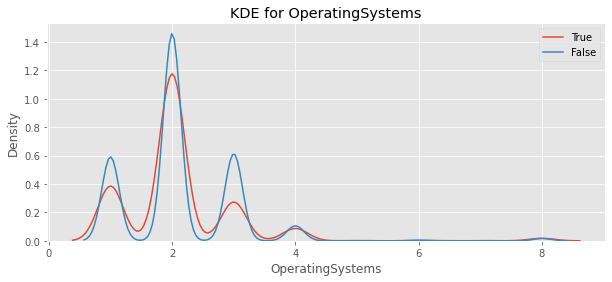

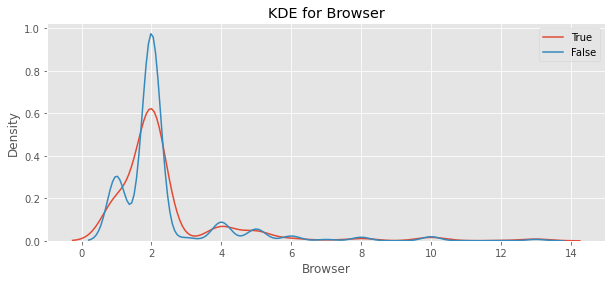

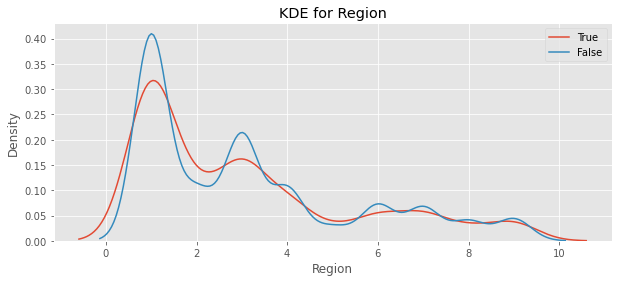

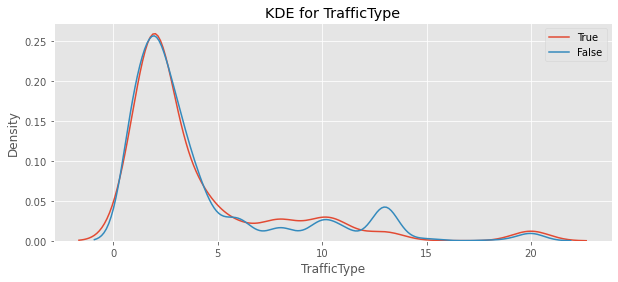

In [15]:
# 量化變數繪圖 (KDE plot)
for feature in shop_quantitative.columns:
    plt.figure(figsize=(10,4))
    plt.title("KDE for {}".format(feature))
    sns.kdeplot(shop_pos[feature], label='True')
    sns.kdeplot(shop_neg[feature], label='False')
    plt.legend()
    plt.show()

In [ ]:
plt.figure(figsize=(14, 14))
corr = shop_df.drop(columns=['Revenue_n']).corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, xticklabels=corr.columns,mask=mask, yticklabels=corr.columns, square=True,
                  linewidths=.2, cmap="YlGnBu",annot=True)

In [ ]:
# 區分連續與量化資料
shop_categorial, shop_quantitative = split_data_by_feature_types(shop_df)

shop_X = shop_df.drop(columns=["Revenue", "Revenue_n"])
shop_y_f = ["Revenue"] #目標變數
cat_cols   = shop_categorial.columns.drop("Revenue")  #類別變數
num_cols   = shop_quantitative.columns.drop("Revenue_n")  #數值變數
bin_cols   = shop_X.nunique()[shop_X.nunique() == 2].keys().tolist()  #二元變數
multi_cols = [i for i in cat_cols if i not in bin_cols]  #多元變數

#對二元變數編碼
encoder = LabelEncoder()
for i in bin_cols :
    shop_X[i] = encoder.fit_transform(shop_X[i])
    
#對多元變數編碼
shop_X = pd.get_dummies(data = shop_X, columns = multi_cols)

#標準化數值變數
std = StandardScaler()
shop_X[num_cols] = std.fit_transform(shop_X[num_cols])